# Linear Regression Code Demo

- **Objective**: Develop a multiple linear regression (MLR) model and explain steps throughout demo
- **Dataset**: Boston Housing

In [ ]:
"""
Description of the features of our dataset that we are dealing with

1. CRIM: This column represents per capita crime rate by town
2. ZN: This column represents the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3. INDUS: This column represents the proportion of non-retail business acres per town.
4. CHAS: This column represents the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
5. NOX: This column represents the concentration of the nitric oxide (parts per 10 million)
6. RM: This column represents the average number of rooms per dwelling
7. AGE: This column represents the proportion of owner-occupied units built prior to 1940
8. DIS: This column represents the weighted distances to five Boston employment centers
9. RAD: This column represents the index of accessibility to radial highways
10. TAX: This column represents the full-value property-tax rate per $10,000
11. PTRATIO: This column represents the pupil-teacher ratio by town
12. B: Bk is the proportion of people of African American descent by town
13. LSTAT: This is the percentage lower status of the population
14. MEDV (TARGET VARIABLE): This is the median value of owner-occupied homes in $1000s


Our target variable that we are trying to predict is MEDV
"""

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Boston Housing Dataset is inbuilt through sklearn, can load through import rather than traditional csv file
from sklearn import datasets
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names) #converting the inbuilt dataset to a dataframe we can use
df['MEDV'] = boston.target #Setting the response variable that we are predicting

#Other imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#to check variables we are dealing with and data type
#notice we have all numeric values, no categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
#Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#Check the statistics of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#Let's explore correlation of these variables
corr_matrix = df.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## Exploratory Data Analysis (EDA)

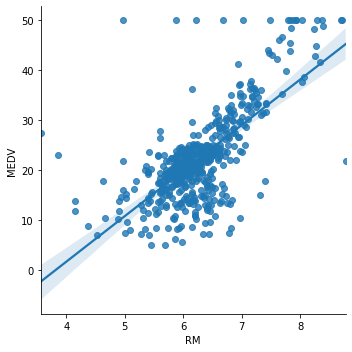

In [9]:
#Notice RM (average number of rooms per dwelling) has a high correlation with our response variable in MEDV,
#we can visualize with a simple plot
sns.lmplot(x = 'RM', y = 'MEDV', data = df)

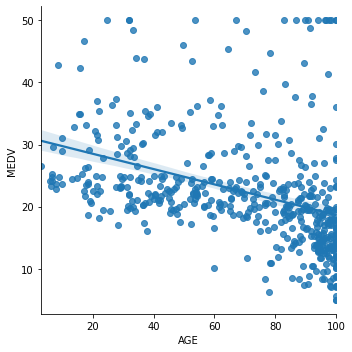

In [10]:
"""If you want line graphs for specific variables we can make a simple function, where you can input and generate the 
line graph like above"""

def visualizeLinRelationship(x, y, dataframe):
    """
    x (str): the numerical variable you want to input
    y (str): In this case our response variable is "MEDV"
    dataframe (Pandas dataframe): Whatever dataset you are working with
    """
    sns.lmplot(x = x, y = y, data = dataframe)

#For example if you wanted to observe relationship between MEDV and Age using the function
visualizeLinRelationship("AGE", "MEDV", df)

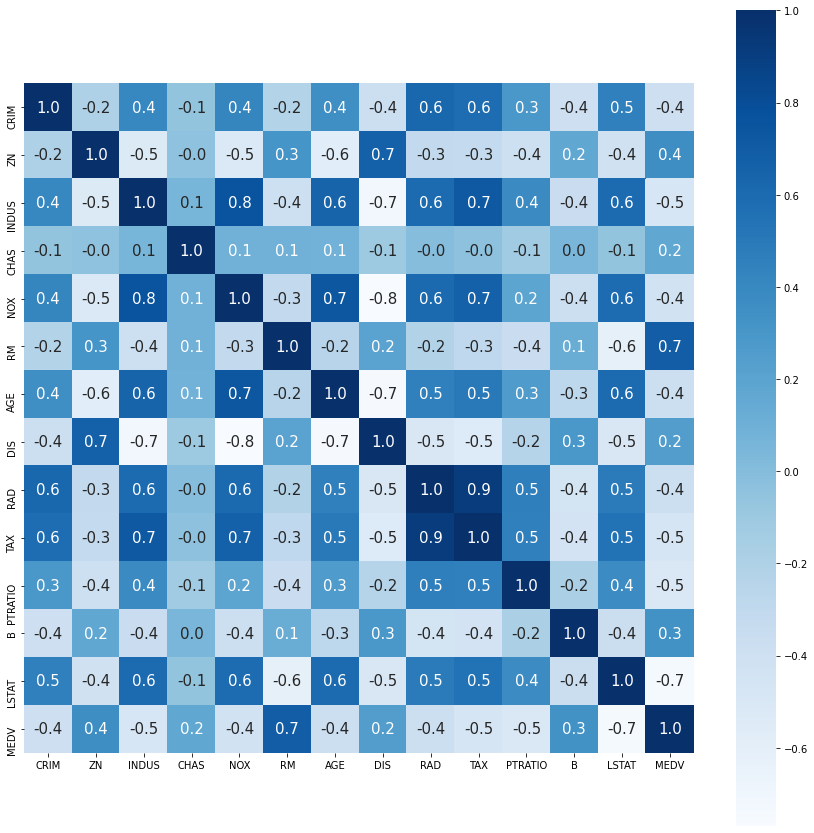

In [11]:
#To observe correlations between all variables
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':15}, cmap = 'Blues')

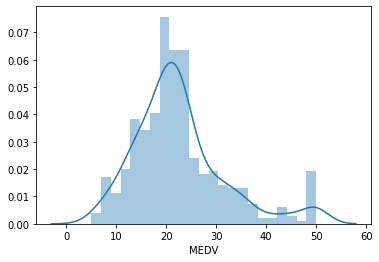

In [12]:
#Histogram of our target/response variable in MEDV
sns.distplot(df['MEDV'])

## Training Model

In [20]:
#Splitting the data before modelling
X = df.drop(['MEDV'], axis = 1) #dropping our response variable for the X columns
y = df['MEDV']

#Splitting the dataset 80-20 for train-test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
#Understanding the coefficients of the model in linear regression
X_coeff = pd.DataFrame([X_train.columns,lm.coef_]).T
X_coeff = X_coeff.rename(columns={0: 'Attribute', 1: 'Coefficients of Predictors'})
X_coeff

,Attribute,Coefficients of Predictors
0,CRIM,-0.113056
1,ZN,0.0301105
2,INDUS,0.0403807
3,CHAS,2.78444
4,NOX,-17.2026
5,RM,4.43884
6,AGE,-0.00629636
7,DIS,-1.44787
8,RAD,0.26243
9,TAX,-0.0106468


## Interpreting the coefficients of a linear regression model

A MLR Regression Model follows an equation of the form, with as many X's as variables you have (minus the response variable of course).

- **B0**: Intercept
- **X**(1 to n, n being however many predictors you have): Predictor Variable(s)
- **B**(1 to n, n being however many predictors you have): Regression Coefficient(s)
- **e**: the residual error
- **Y**: response variable

**Y = B0 + B1*X1 + B2*X2 + e.**

For our example let's say X1 is CRIM (crime rate per town). CRIM's B1 value is -0.113056. This B1 value represents the change in our predicted value of Y (MEDV) given a **one-unit difference** in X1/CRIM, **IF** X2 and all other variables are held constant. So for example if CRIM increases by one unit we can expect a decrease of -0.113056 units in our response/pricing value. Obviously these units depend on your specific case and often require conversion to make full sense, but you can get a general understanding based off of the sign of your coefficient itself to understand the impact of the variable. Let's split our variables into positive and negative coefficients.

In [23]:
#Filtering for positive and negative coefficients
positiveCoeff = X_coeff[X_coeff['Coefficients of Predictors'] > 0]
negativeCoeff = X_coeff[X_coeff['Coefficients of Predictors'] < 0]

In [24]:
positiveCoeff

,Attribute,Coefficients of Predictors
1,ZN,0.0301105
2,INDUS,0.0403807
3,CHAS,2.78444
5,RM,4.43884
8,RAD,0.26243
11,B,0.0123513


In [25]:
negativeCoeff

,Attribute,Coefficients of Predictors
0,CRIM,-0.113056
4,NOX,-17.2026
6,AGE,-0.00629636
7,DIS,-1.44787
9,TAX,-0.0106468
10,PTRATIO,-0.915456
12,LSTAT,-0.508571


A general interpretation without unit conversion and more, is that the variables in the positive dataframe contribute to an increased pricing in housing (MEDV), while those in the negative dataframe contribute to a decreased value.

## Model Prediction

In [26]:
Y_Pred = lm.predict(X_train)
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_train, Y_Pred) #Mean Absolute Error
RMSE = np.sqrt(metrics.mean_squared_error(y_train, Y_Pred)) #Root Mean Squared Error
print('MAE: ', MAE)
print('RMSE: ', RMSE)

MAE:  3.3147716267832266
RMSE:  4.6520331848801675


## Understanding Metrics

- **MAE (Mean Absolute Error)**: In simple words it is the average of the differences between the predicted and actual observations (Y_pred vs y_test)
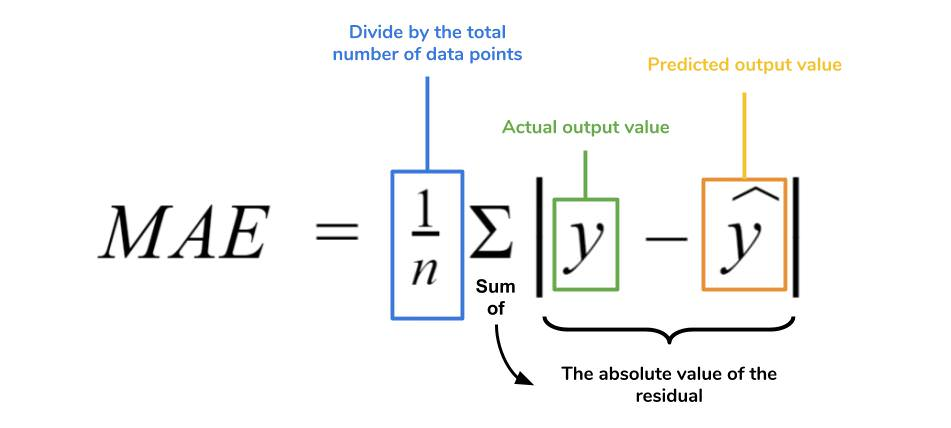

- **RMSE (Root Mean Squared Error)**: A very similar metrics with the same idea but it squares the differences between predicted and actual observations, and then takes the square root of the average of these squared differences.
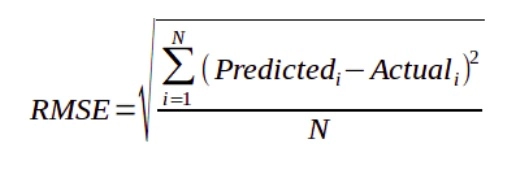

## Cross Validation

Cross validation is a method that you can implement with various ML models to deal with **overfitting**. Overfitting is when your model is overtrained on a specific dataset, your model is giving you great predictions for your specific data but will not perform up to that standard with other data as it is almost too geared towards your data you have been feeding it. Cross validation in simple words, allows you to **reserve** a sample of your dataset, which you can work with after training your model before proceeding to the test data. There are numerous flavors of cross validation such as **Leave One Out Cross Validation (LOOCV)** or **k-fold Cross Validation**. I have attached a link for deeper description of some of these techniques. 

https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [69]:
from sklearn.model_selection import cross_val_score
LR_scores = cross_val_score(lm, X_train, Y_train,
                             scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-LR_scores)
print("The root mean squared error of the validation sets are: " + str(LR_rmse_scores))

The root mean squared error of the validation sets are: [4.14750971 5.86588332 4.87168245 4.50382793 4.75856192]


## Test Data/Predictions

In [71]:
Y_Test_Pred = lm.predict(X_test)
#Using two test metrics
LinearReg_MAE = metrics.mean_absolute_error(y_test, Y_Test_Pred) #Mean Absolute Error
LinearReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, Y_Test_Pred)) #Root Mean Squared Error
print('LinearReg_MAE: ', LinearReg_MAE)
print('LinearReg_RMSE: ', LinearReg_RMSE)

LinearReg_MAE:  3.1890919658878323
LinearReg_RMSE:  4.928602182665329


## Visualize Results

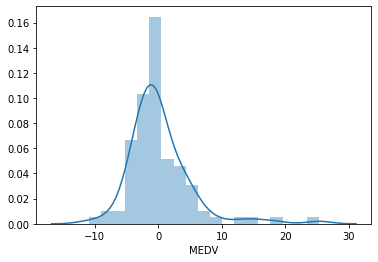

In [73]:
#The difference between actual values vs our predicted values
sns.distplot((y_test - Y_Test_Pred))